<a href="https://colab.research.google.com/github/brahma102/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the required packages





In [2]:
# importing libraries
import pandas as pd               # for data manipulation
import numpy as np                # for mathemathical operations and linear algebra
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for data visualization 
import plotly.express as px       # for data visualization
from sklearn.impute import SimpleImputer


# **Play Store Data**
## Read the dataset into dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
# reading dataset
path  = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 1/"
df1 = pd.read_csv(path + "Play Store Data.csv")
# df3 = pd.read_csv(path + "User Reviews.csv")

In [5]:
# displaying the head or the first 10 rows of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [6]:
# look at the random 5 records in the apps dataframe
df1.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9822,School scientific calculator fx 500 es plus 50...,FAMILY,4.6,1553,9.2M,"100,000+",Free,0,Everyone,Education,"August 2, 2018",3.3.1-build-02-08-2018-19-release,4.0 and up
4464,PixelLab - Text on pictures,PHOTOGRAPHY,4.6,108002,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"July 26, 2018",Varies with device,Varies with device
223,sABN,BUSINESS,4.4,2287,1.5M,"1,000,000+",Free,0,Everyone,Business,"March 26, 2018",4.9,2.2 and up
8371,ZombieVital DG,FAMILY,4.3,10,20M,100+,Paid,$12.99,Everyone,Simulation,"August 4, 2018",Varies with device,Varies with device
6953,BxPort - Bitcoin Bx (Thailand),FINANCE,5.0,4,4.1M,50+,Free,0,Everyone,Finance,"July 14, 2018",1.0.4,4.2 and up


In [7]:
#Informatation of app dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Description of App Dataset columns
App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [8]:
# type of Category
x=df1['Category'].unique()
print('Total no of category of app present in playstore is:-',len(x))

Total no of category of app present in playstore is:- 34


By diagnosing the data frame, we know that:

There are 13 columns of properties with 10841 rows of data.

Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'

Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.

Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.

Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

##Data cleaning and change the datatypes

In [46]:
#Convert install coloum string to int in  install price and review

def convert_int(x):
    x=x+','+'+'+'M'+'k'+'$'  
    x=x.replace(',','')
    x=x.replace('+','')
    x=x.replace('M','')
    x=x.replace('k','')
    x=x.replace('$','')
    if x=='Free' or x=='Varies with device'or x=='Everyone':
        x=0
    #elif x==
    else:
        x=eval(x)
    
 
    return x

In [47]:
#convert installs,price,reviews to int valu so that it better for calcilatation
df1['Installs']=df1['Installs'].apply(convert_int)
 
#df1['Size_int']=df1['Size'].apply(convert_int)
df1['Price']=df1['Price'].apply(convert_int)
df1['Reviews']=df1['Reviews'].apply(convert_int)

In [48]:
#convert size due to size devided into multiple catagory so we convert into to same format(mb=1024k, k=mb/1024)
def convert_int2(x):
    x=x.lower()
   
    if x=='varies with device':
        x=0
    else:
        if 'm' in x:
            
            x=x+','+'+'+'m'+'$'  
            x=x.replace(',','')
            x=x.replace('+','')
            x=x.replace('m','')
            #x=x.replace('k','')
            x=x.replace('$','')
            x=eval(x)
        elif 'k' in x :
            
            x=x+','+'+'+'k'+'$'  
            x=x.replace(',','')
            x=x.replace('+','')
            #x=x.replace('M','')
            x=x.replace('k','')
            x=x.replace('$','')
            x=eval(x)/1024
        else:
            x=-100
  
    return x
df1['Size_int']=df1['Size'].apply(convert_int2)

In [49]:
# Remove wich app reating is more than 5 un used entry
r=df1[df1['Rating']>5].index 

df1=df1.drop(r)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_int        10840 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.2+ MB


In [51]:
# check on null values
df1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_int             0
dtype: int64

##Remove null value

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

median=In statistics and probability theory, the median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. For a data set, it may be thought of as "the middle" value

In [52]:
x=df1['Rating'].median()
x
df1['Rating']=df1['Rating'].fillna(x)

In [53]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

In [54]:
#Remove the app which has contain no type
y=df1[df1['Type'].isna()].index
df1=df1.drop(index=y)
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
Size_int          0
dtype: int64

##Q1.Based on higest riview we creat the data set and change it.

In [55]:
#Based on higest riview we creat the data set and change the 
df2=pd.DataFrame(df1)
df2.sort_values(by='Reviews',ascending=False, inplace=True)

df2=df2.drop_duplicates(subset=['App'])
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000,Free,0.00,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1000000000,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888.0,98M,100000000,Free,0.00,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Doctors Care,MEDICAL,4.3,0.0,25M,10,Free,0.00,Everyone,Medical,"July 24, 2018",2.0.0 (35717),4.4 and up,25.0
2439,Weill Cornell Medicine,MEDICAL,4.3,0.0,19M,50,Free,0.00,Everyone,Medical,"July 16, 2018",1.0.10,5.0 and up,19.0
2438,Pediatric Emergency Guide,MEDICAL,4.3,0.0,3.8M,100,Free,0.00,Everyone,Medical,"July 9, 2018",3.1.1,4.4 and up,3.8
2437,Dare EMS Protocols,MEDICAL,4.3,0.0,20M,10,Free,0.00,Everyone 10+,Medical,"July 26, 2018",1.8.3,4.1 and up,20.0


##Q2.statistical information of the dataframe?

In [18]:
# check on statistical information of the dataframe
df2.describe()

,Rating,Reviews,Installs,Price,Size_int
count,9658.000000,9.658000e+03,9.658000e+03,9658.000000,9658.000000
mean,4.192452,2.168266e+05,7.798978e+06,1.097344,32.420553
std,0.496080,1.831524e+06,5.377245e+07,16.852487,96.488804
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,3.400000
50%,4.300000,9.695000e+02,1.000000e+05,0.000000,10.000000
75%,4.500000,2.945775e+04,1.000000e+06,0.000000,28.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1020.000000


# Data visualization

###V1: No of app from category wise?

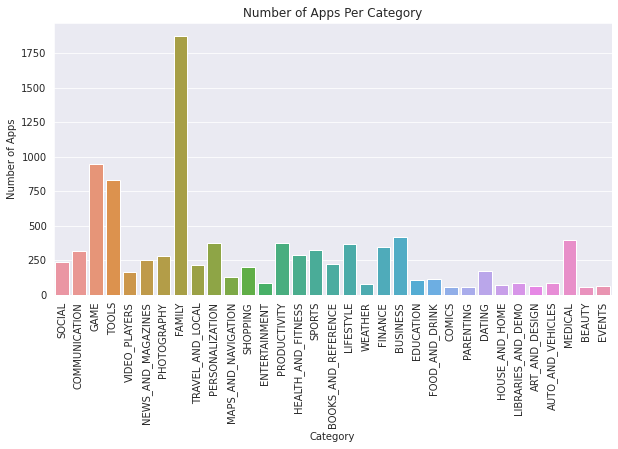

In [19]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=df2)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

Here we see that there are highest no of app from family catagory.In second there is game

##Q3. Count total no of instalation category wise

In [20]:
#Count total no of instalation
users=df2.groupby(['Category'])['Installs'].sum().reset_index()
users

,Category,Installs
0,ART_AND_DESIGN,113238100
1,AUTO_AND_VEHICLES,53130211
2,BEAUTY,27197050
3,BOOKS_AND_REFERENCE,1665969576
4,BUSINESS,697164865
5,COMICS,44981150
6,COMMUNICATION,11038276251
7,DATING,140925107
8,EDUCATION,188952000
9,ENTERTAINMENT,989660000


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 2544 to 8019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   float64
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
 13  Size_int        9658 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 1.4+ MB


##V2.Highest user/installed catagory

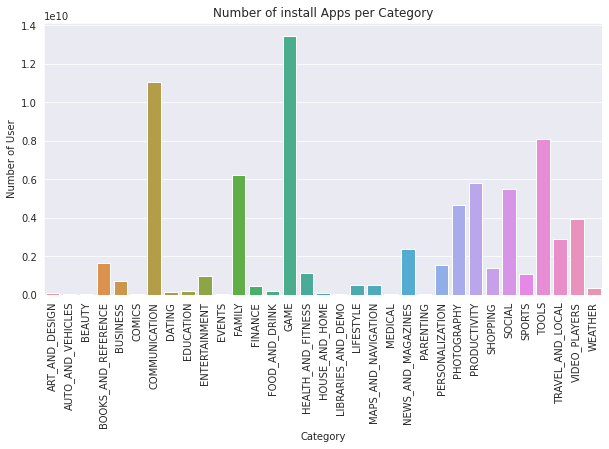

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Category',y='Installs',data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

As for the above graph we colclude that most user showing there intrest in Gaming app and after game people show there intrest in communication apps.
The highest install app is Game app and communicatation app is in second

##V3.Rating distributaion?

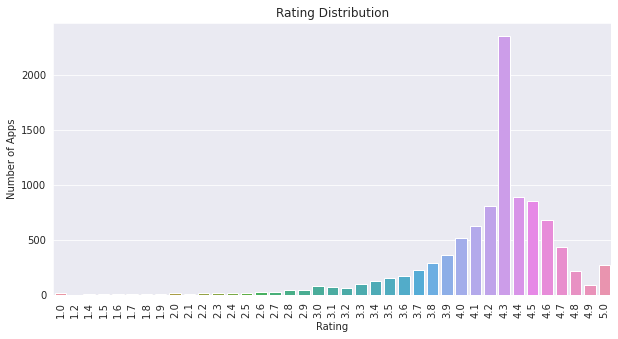

In [23]:
# show the distribution of rating
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=df2)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

##V4. Rating given by user from each catagory

Avg rating:- 4.192451853386149


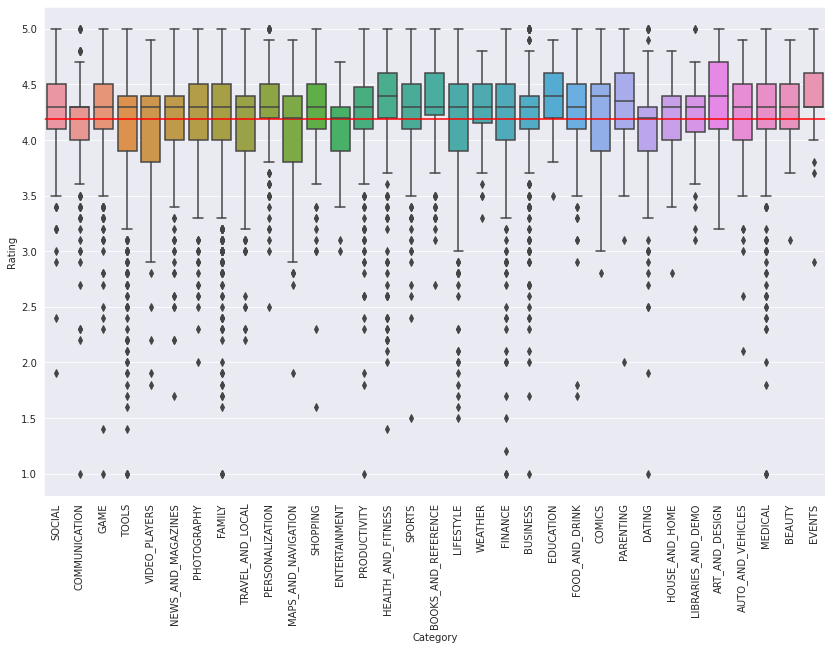

In [56]:
#Compare  the app catagory wise with rating..here we she which catagory get more rating with avg and which is low
plt.figure(figsize=(14,9))


val = sns.boxplot(data=df2, x="Category", y="Rating")
val.axhline(df2['Rating'].mean(),ls="-",color="red")
x=plt.xticks(rotation=90)
print('Avg rating:-',df2['Rating'].mean())

Red Line is the Average of rating

Performance of all app categories is mostly Decent. Highest quality apps with 50% apps with a rating higher than 4.5 are Health and Fitness and Book and Reference app. This is considered to be extremely high!

However, the apps in Dating category having lower rating than the average ratings is 50%.

The game catagory app more app rated from compare to avg and from Health and Fitness almost all app rated more than avg this is consider as posetive feedback of those catagory.

##Q4.Grouping by rating

In [24]:
#Ratin as compare to no of installs ,as for size,as for price and as for review
rating=df2.groupby(['Rating']).sum().reset_index()
rating.head()

,Rating,Reviews,Installs,Price,Size_int
0,1.0,28.0,5170,4.48,228.8
1,1.2,44.0,1000,0.00,27.0
2,1.4,98.0,7000,0.00,20.2
3,1.5,61.0,1105,0.00,54.0
4,1.6,691.0,152000,0.00,64.6


##V5.Other catagory corelatation with rating

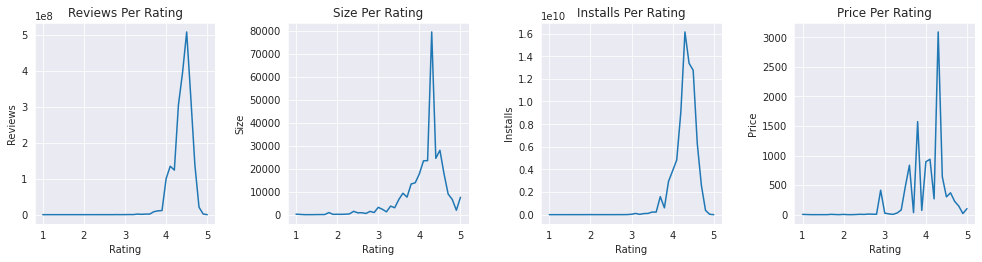

In [25]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating['Rating'], rating['Reviews'])
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating['Rating'], rating['Size_int'] )
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating['Rating'], rating['Installs'] )
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating['Rating'], rating['Price'] )
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above graphs, we found that most of the apps whose rating range is in between 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

##V6.Different type of app on base of price(free/paid)

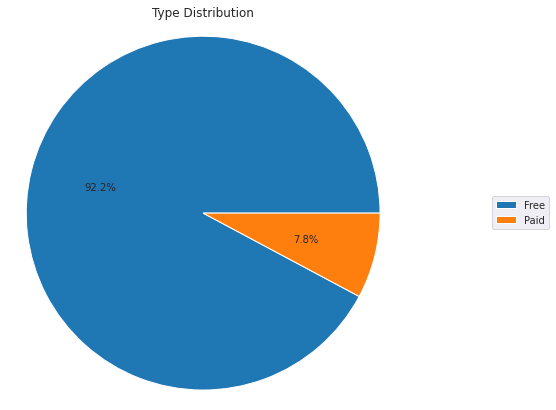

In [57]:
# application type distribution
#Here we use count plot because here we count a paricular coloum comparision
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Type'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Type Distribution')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

##V7.Content wise disribute app

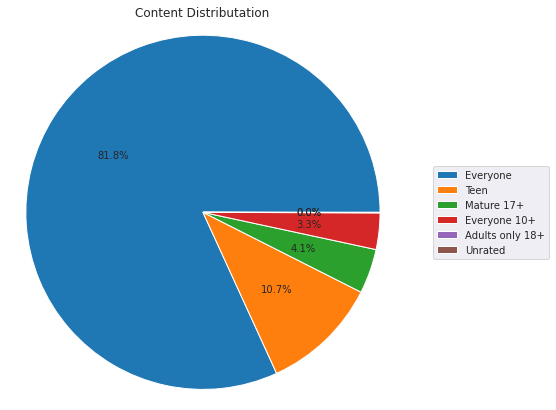

In [58]:
# here we just see diffent type of content prest in playstore
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

number_of_apps = df2['Content Rating'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Content Distributation')
plt.show()

Here we see most of content avalable for every one.

###V8. Corelatation graph (IMP)

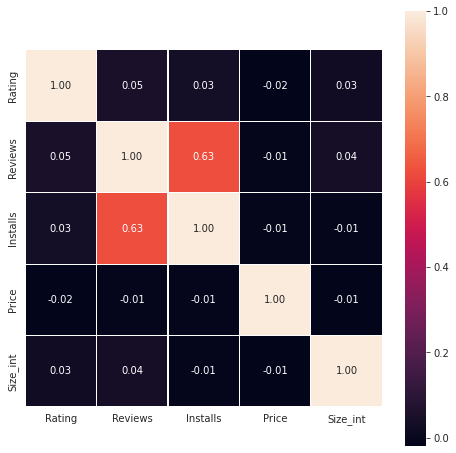

In [59]:
#Corilation with each catagory to other catagory by using heat map
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(), ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

Installs and review are highly corelated to each other.

A moderate positive correlation of 0.63 exists between the number of reviews and number of installs. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

# some important point we get after Data visualization 

##Q5. What is the top 5 apps on the basis of highest installs?

In [60]:
# What is the top 5 apps on the basis of highest installs?
df = df2.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
451,Gmail,COMMUNICATION,4.3,4604483.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,0.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373.0,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,13.0


##Q6.Top 5 riviewed app by user?

In [31]:
#Top 5 riviewed app by user
df2.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
2544,Facebook,SOCIAL,4.1,78158306.0,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446.0,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
1879,Clash of Clans,GAME,4.6,44893888.0,98M,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,98.0


##Q7. What is the top 5 expensive apps?

In [32]:
# What is the top 5 expensive apps?

df = df2.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.3
5351,I am rich,LIFESTYLE,3.8,3547.0,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,1.8
5369,I am Rich,FINANCE,4.3,180.0,3.8M,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up,3.8
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7M,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,2.7
4197,most expensive app (H),FAMILY,4.3,6.0,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,1.5


##Q8.So we check top 5 most installed game?

### As before we see the most install category app is Game 

In [33]:
#  What is the top 5 most installed apps in Game category?
# Top 5 popular game as for highest no of instalation
df = df2[df2['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
1917,Subway Surfers,GAME,4.5,27725352.0,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,76.0
1966,Candy Crush Saga,GAME,4.4,22430188.0,74M,500000000,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,74.0
1908,My Talking Tom,GAME,4.5,14892469.0,Varies with device,500000000,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0.0
1920,Temple Run 2,GAME,4.3,8119154.0,62M,500000000,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up,62.0
1885,Pou,GAME,4.3,10486018.0,24M,500000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,24.0


##Q9.Which 5 apps from the 'FAMILY' category are having the lowest rating?

###As for our analysis we see that the the highest no of app present from family catagory but after that with compare of game app the user of family catagory is likely half of that. but still the family catagory less use by user so we do this to know which family app not gives impact

In [34]:
# Which 5 apps from the 'FAMILY' category are having the lowest rating?

df = df2[df2['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head()
#As for rating those app not get good responce frome user .
#Those 5 app are in last 5 position frome highest app catagory(Family).

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2.0,21M,1000,Free,0.00,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,21.0
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1.0,2.0M,50,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,2.0
4127,Speech Therapy: F,FAMILY,1.0,1.0,16M,10,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,16.0
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402.0,1.7M,100000,Free,0.00,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,1.7
6135,BG TV App,FAMILY,1.7,6.0,2.9M,100,Free,0.00,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up,2.9


# Conclusion

The Google Play Store Apps report provides some useful details regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY but still used most. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. 
 The size and price   shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans ,google apps etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store . As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

In [35]:
#second datset
df3.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27211,ClassDojo,NaN,NaN,NaN,NaN
38980,Easy Voice Recorder,Just got made couple recordings. It seems thin...,Positive,0.600000,0.744444
60971,Helix Jump,I liked lot I paid remove ads surprise! You ca...,Positive,0.187500,0.514286
58146,HBO GO: Stream with TV Package,This worked great last update. Now freezes soo...,Positive,0.308333,0.405556
5239,AlReader -any text book reader,Great app.Works flawlessly. Very easy use.The ...,Positive,0.653333,0.562500


In [36]:
df4=pd.merge(df2,df3,how='inner',on='App')   
df4.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_int,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
7113,Extreme Car Driving Simulator,GAME,4.3,2251012.0,52M,100000000,Free,0.0,Everyone,Racing,"May 3, 2018",4.17.2,4.0 and up,52.0,NaN,NaN,NaN,NaN
39758,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592.0,7.5M,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up,7.5,NaN,NaN,NaN,NaN
11380,Hotspot Shield Free VPN Proxy & Wi-Fi Security,TOOLS,4.2,1116393.0,8.2M,50000000,Free,0.0,Everyone,Tools,"August 6, 2018",6.1.0,4.1 and up,8.2,nice,Positive,0.6,1.0
11879,DEER HUNTER 2018,GAME,4.3,955656.0,82M,10000000,Free,0.0,Teen,Action,"June 26, 2018",5.1.2,3.0 and up,82.0,NaN,NaN,NaN,NaN
2289,Google Play Games,FAMILY,4.3,7168735.0,Varies with device,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,0.0,NaN,NaN,NaN,NaN


In [37]:
#Most Translated_Review app in the playstore

app=df4.groupby(['App','Category'])['Translated_Review'].count().reset_index()
app=pd.DataFrame(app)
#app
app=app.sort_values(by=['Translated_Review'], ascending=False)
#x=app[app['App']=='Facebook']
app.head(5)

,App,Category,Translated_Review
268,Bowmasters,GAME,312
966,Helix Jump,GAME,273
119,Angry Birds Classic,GAME,273
342,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,254
357,Candy Crush Saga,GAME,240


### As for the datset we see that people give there reaction in writen on  Bowmasters,Helix Jump,Angry Birds Classic app. The writen review help the devloper to know how the app work and what type of change neded as for user need.

### And the second thing we notice that most of the reaction('translated_Review') are frome Game catagory.

### People are prefer to give there opinion on gaming app.And then people prefer to give thre opinion on helth app.

## This show that people take much more inrest in Game catagory app in compare to other



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



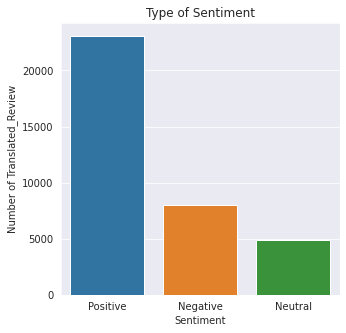

In [38]:
# Compare in positive and negetive review
plt.figure(figsize=(5, 5))
sns.countplot(df4['Sentiment'])
plt.title('Type of Sentiment')
plt.ylabel('Number of Translated_Review')
plt.show()

In [39]:
#Most Translated_Review catagory basis

category=df4.groupby(['Category'])['Translated_Review'].count().reset_index()
category=pd.DataFrame(category)

category=category.sort_values(by=['Translated_Review'], ascending=False)
 
category.head(5)

,Category,Translated_Review
14,GAME,5947
11,FAMILY,3277
15,HEALTH_AND_FITNESS,2249
7,DATING,1715
30,TRAVEL_AND_LOCAL,1692


From the above table we see that the highest no of user give there opinion as writen('Translated_Review')in game app the family and health app

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



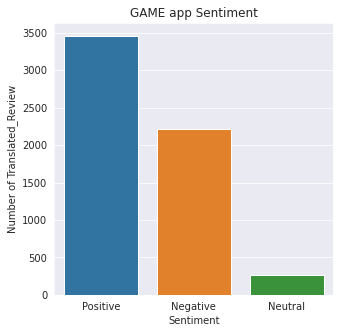

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



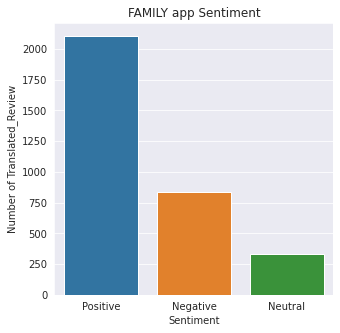

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



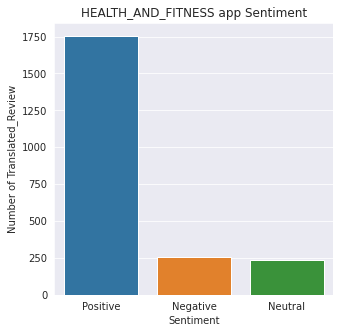

In [40]:
# Reacation calculation on top 3 category app
x=['GAME','FAMILY','HEALTH_AND_FITNESS']
for i in x:
    
    df5=df4[df4['Category']==i]
    
# Compare in positive and negetive review
    plt.figure(figsize=(5, 5))
    sns.countplot(df5['Sentiment'])
    plt.title(f'{i} app Sentiment')
    plt.ylabel('Number of Translated_Review')
    plt.show()

Frome the above graphs we notice that we got good review in Gaming catagory. As for our analysis we got that posetive review and negetive riview both are high..so we conclude that pepole also give there posetive and negetive  feed back eqaly which help show the engegment of user in the app.

In secend part we work on graph of family catagory.He the comparision ratio of positve and negatative is avarage..the ratio between  positve and negatative ratio is aproximetly 5:2 .


In thrid part we consider the thrid highest writen riviewed app catagory HEALTH_AND_FITNESS	.Here we see that the percentage of posetive is verymuch high in compare to negative.As for this graph we conclude that only satisfyed user give writen riview. It may creat difficult to indedntify why and which customer is dis satisfied and also it is diffucielt for the devloper what is improvment in the app